This demo plots the parameter and predictive posterior for a coin flip with a Bernoulli likelihood and uniform prior as outlined in lecture.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display

First, define the prior and likelihood at any point in the parameter space.
Note that for demonstration we will work with PDF's rather than log-PDF's which would be more stable.

In [2]:
def prior(w):
    """ uniform prior in range [0,1] """
    #return (1.-w)**2 * w**4 # my friend got four heads and two tails
    return np.ones(w.shape)


def likelihood(w, y):
    """ Bernoulli likelihood. w is class-conditional probabiltiy of y = 1 """
    return np.product((1.-w)**(~y) * w**y, axis=0)

We'll compute the posterior numerically by specifying a grid over $w$ and performing inference on this discrete grid.
Plot the prior, likelihood and posterior for several coin flips.

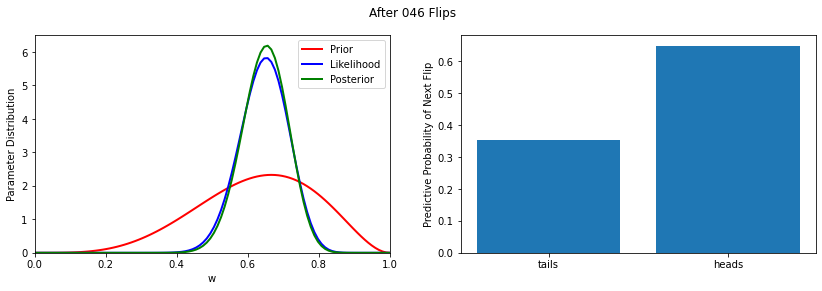

In [3]:
w = np.linspace(0, 1, num=100).reshape((1,-1)) # grid over w
y = np.zeros((0,1), dtype=bool)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

np.random.seed(0)
pr = prior(w) # evaluate the prior across w
for i in range(100):
    y = np.vstack([y, [[np.random.rand() >= 0.5]]]) # flip the coin
    plt.suptitle("After %03d Flips" % (i+1))
    
    # compute and plot the parameter distributions
    li = likelihood(w, y) # evaluate the likelihood across w
    post = li * pr / np.mean(li * pr) # evaluate the posterior across w
    axs[0].cla()
    axs[0].plot(w.squeeze(), (pr/np.mean(pr)).squeeze(), 'r', label="Prior", lw=2)
    axs[0].plot(w.squeeze(), (li/np.mean(li)).squeeze(), 'b', label="Likelihood", lw=2)
    axs[0].plot(w.squeeze(), post.squeeze(), 'g', label="Posterior", lw=2)
    axs[0].set_xlim([0,1])
    axs[0].set_ylim([0, axs[0].get_ylim()[1]])
    axs[0].set_xlabel("w")
    axs[0].set_ylabel("Parameter Distribution")
    axs[0].legend(loc=0)
    
    # compute and plot the predictive distribution
    Pr_0 = np.sum(post * likelihood(w, np.zeros((1,1), dtype=bool))) / w.size
    Pr_1 = np.sum(post * likelihood(w, np.ones((1,1), dtype=bool))) / w.size
    axs[1].cla()
    axs[1].bar(['tails','heads'], [Pr_0, Pr_1])
    axs[1].set_ylabel("Predictive Probability of Next Flip")
    display.display(fig)
    display.clear_output(wait=True)
    if i == 0:
        time.sleep(2)
    elif i < 5:
        time.sleep(0.5)
    else:
        continue